In [399]:
##comando para instalar mysql.connector en windows->   python -m pip install mysql-connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
%matplotlib inline
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [400]:
## Datos de conexión
host = "localhost"
bd = "python_pruebas"
passw = ""
user = "root"

In [401]:
#conexion a base de datos
db = mysql.connector.connect(host=host, user=user, passwd=passw, database=bd)

In [402]:
##cargando dataFrame con consulta SQL 
datos = pd.read_sql("SELECT * FROM anime",db)


In [403]:
#Se muestran los nombres de las columnas y algunos registros
datos.head()

,codigo,nombre,genero,tipo,episodios,rating,miembros
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins,,,0,0.00,
4,9969,Gintama&#039,,,0,0.00,


### Limpieza de datos

In [404]:
#Se observa el estado de los registros
datos.count()

codigo       3236
nombre       3236
genero       3236
tipo         3236
episodios    3236
rating       3236
miembros     3236
dtype: int64

In [405]:
#se observa la cantidad de registros con valor null o NaN
datos.isna().sum()

codigo       0
nombre       0
genero       0
tipo         0
episodios    0
rating       0
miembros     0
dtype: int64

In [406]:
#se eliminan todos los registros que no tienen tienen episodios, ya que al hacer un promedio de rating lo sesgarian a 0 y habría una mala interpretación de los datos
datos = datos.loc[datos.episodios != 0]

In [407]:
#se elimina la columna 'codigo' ya que no es de utilidad
datos = datos.drop('codigo', axis=1)

In [408]:
#se ordena el conjunto de datos alfabeticamente por el nombre
datos = datos.sort_values('nombre')

In [409]:
#se reinicia el indice y se elimina el anterior para que conserve el orden que se le dio al nombre alfabeticamente  
datos.reset_index(inplace=True)
datos.drop('index', axis = 1, inplace=True)

In [410]:
#finalmente la cabecera de los datos limpios son:
datos.head()

,nombre,genero,tipo,episodios,rating,miembros
0,.hack//G.U. Trilogy,"Action, Fantasy, Game, Sci-Fi",Movie,1,7.32,22537
1,.hack//Quantum,"Action, Adventure, Fantasy, Game, Sci-Fi",OVA,3,7.36,26163
2,.hack//Roots,"Adventure, Drama, Fantasy, Game, Sci-Fi",TV,26,7.06,50480
3,.hack//Sign,"Adventure, Fantasy, Game, Magic, Mystery, Sci-Fi",TV,26,7.14,110304
4,.hack//The Movie: Sekai no Mukou ni,"Action, Adventure, Fantasy, Game, Magic, Myste...",Movie,1,7.32,11617


In [411]:
#también se verifica que los datos sean concisos y tengan la misma cantidad de registros en cada columna
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 6 columns):
nombre       3130 non-null object
genero       3130 non-null object
tipo         3130 non-null object
episodios    3130 non-null int64
rating       3130 non-null float64
miembros     3130 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 146.8+ KB


## Representación de los datos

In [412]:
#se va identificar la cantidad de cada tipo de anime, para ello se van agrupar y contar los registros de la columna tipo
tipos_anime = datos.groupby(['tipo']).size().reset_index(name='numero_preferencias')
tipos_anime

,tipo,numero_preferencias
0,Movie,612
1,Music,37
2,ONA,53
3,OVA,468
4,Special,433
5,TV,1527


<IPython.core.display.Javascript object>


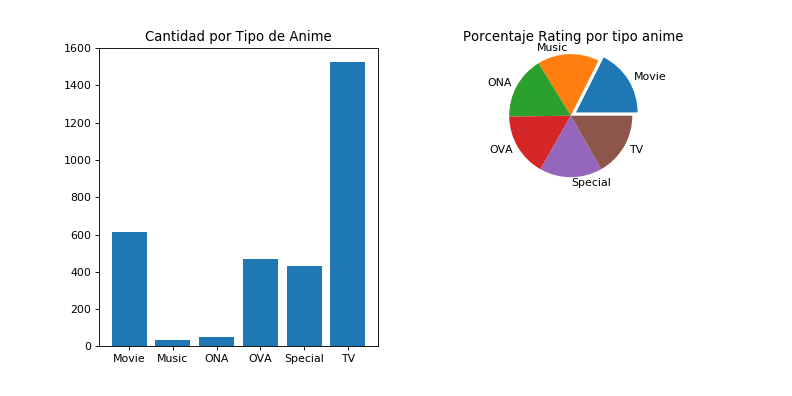

In [413]:
#se procede a graficar la información en un gráfico de barras

plt.figure(figsize=(10, 5))
plt.xlabel('Tipos de Animes')
plt.ylabel('Cantidad')
plt.subplot(121, title="Cantidad por Tipo de Anime")
plt.bar(tipos_anime.tipo, tipos_anime.numero_preferencias)
# plt.title('Cantidad por Tipo de Anime')


promedios = list()
promedios.append(round(datos.loc[datos.tipo == 'Movie']['rating'].mean()))
promedios.append(datos.loc[datos.tipo == 'Music']['rating'].mean())
promedios.append(datos.loc[datos.tipo == 'ONA']['rating'].mean())
promedios.append(datos.loc[datos.tipo == 'OVA']['rating'].mean())
promedios.append(datos.loc[datos.tipo == 'Special']['rating'].mean())
promedios.append(datos.loc[datos.tipo == 'TV']['rating'].mean())

plt.subplot(222, title="Porcentaje Rating por tipo anime")
plt.pie(promedios, labels=tipos_anime.tipo, explode = (0.1, 0, 0, 0, 0, 0))
plt.axis('equal')
plt.show()